# 1.7 Network graph visualization
## Table of Contents:
### 1. Installing libraries
### 2. Importing libraries and relationship data
### 3. Creating a network graph
### 4. Graph visualization with Pyvis
### 5. Community detection - Leiden algorithm
### 6. The most important countries in the 20th century
#### - 01 Degree
#### - 02 Closeness
#### - 03 Betweenness

### 1. Installing libraries

In [1]:
pip install pyvis==0.3.1

     ---------------------------------------- 0.0/748.9 kB ? eta -:--:--
      --------------------------------------- 10.2/748.9 kB ? eta -:--:--
     - ----------------------------------- 30.7/748.9 kB 262.6 kB/s eta 0:00:03
     --- --------------------------------- 71.7/748.9 kB 491.5 kB/s eta 0:00:02
     ---- -------------------------------- 92.2/748.9 kB 655.4 kB/s eta 0:00:02
     -------------- ----------------------- 276.5/748.9 kB 1.2 MB/s eta 0:00:01
     ------------------------------ ------- 593.9/748.9 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 748.9/748.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
   ---------------------------------------- 41.7/41.7 kB ? eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755848 sha256=9fd6e0c9670105188ef47e1ad8a10fda29abee3df639ce

In [2]:
pip install seaborn==0.12.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cdlib

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     --------------- ----------------------- 81.9/204.6 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/263.6 kB ? eta -:--:--
   ------------------------------------- - 256.0/263.6 kB 16.4 MB/s eta 0:00:01
   ------------------------------------- - 256.0/263.6 kB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 263.6/263.6 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------- -------------------------- 0.6/1.7 MB 12.2 MB/s eta 0:00:01
   ---------------------- ----------------- 0.9/1.7 MB 1

  You can safely remove it manually.
  You can safely remove it manually.


### 2. Importing libraries and relationship data

In [58]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [59]:
# Import relationship data

relationship_df = pd.read_csv('../02 Data/Prepared Data/20th_century_relationships.csv', index_col = 0)

In [60]:
relationship_df

,source,target,value
0,france,italy,13
1,italy,russia,6
2,germany,russia,27
3,austria,germany,17
4,austria,hungary,6
...,...,...,...
69,finland,russia,6
70,italy,japan,6
71,romania,russia,6
72,india,lebanon,1


### 3. Creating a network graph

In [61]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

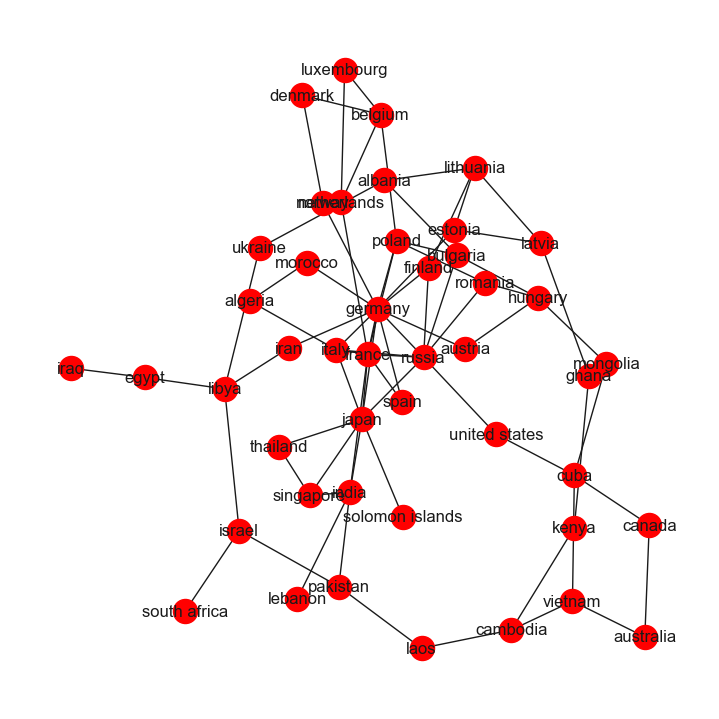

In [62]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

### 4. Graph visualization with Pyvis

In [63]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20thcentury.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### 5. Community detection - Leiden algorithm

In [64]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install leidenalg

Note: you may need to restart the kernel to use updated packages.


In [66]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [67]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [68]:
new_com = coms.to_node_community_map()

In [69]:
new_com

defaultdict(list,
            {'france': [0],
             'italy': [0],
             'russia': [0],
             'germany': [0],
             'spain': [0],
             'finland': [0],
             'morocco': [0],
             'algeria': [0],
             'pakistan': [1],
             'israel': [1],
             'south africa': [1],
             'laos': [1],
             'cambodia': [1],
             'kenya': [1],
             'japan': [2],
             'thailand': [2],
             'singapore': [2],
             'solomon islands': [2],
             'india': [2],
             'lebanon': [2],
             'albania': [3],
             'ukraine': [3],
             'libya': [3],
             'egypt': [3],
             'iraq': [3],
             'iran': [3],
             'mongolia': [4],
             'cuba': [4],
             'canada': [4],
             'australia': [4],
             'vietnam': [4],
             'united states': [4],
             'austria': [5],
             'hungary': [5],

In [70]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [71]:
dict_com

{'france': 0,
 'italy': 0,
 'russia': 0,
 'germany': 0,
 'spain': 0,
 'finland': 0,
 'morocco': 0,
 'algeria': 0,
 'pakistan': 1,
 'israel': 1,
 'south africa': 1,
 'laos': 1,
 'cambodia': 1,
 'kenya': 1,
 'japan': 2,
 'thailand': 2,
 'singapore': 2,
 'solomon islands': 2,
 'india': 2,
 'lebanon': 2,
 'albania': 3,
 'ukraine': 3,
 'libya': 3,
 'egypt': 3,
 'iraq': 3,
 'iran': 3,
 'mongolia': 4,
 'cuba': 4,
 'canada': 4,
 'australia': 4,
 'vietnam': 4,
 'united states': 4,
 'austria': 5,
 'hungary': 5,
 'bulgaria': 5,
 'poland': 5,
 'romania': 5,
 'belgium': 6,
 'netherlands': 6,
 'luxembourg': 6,
 'denmark': 6,
 'norway': 6,
 'estonia': 7,
 'latvia': 7,
 'lithuania': 7,
 'ghana': 7}

In [72]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20thcentury_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### The Leiden algorithm shows more clear how the connections are devided. The wider connections of the countries linked to Germany are clearly the connections that are mentioned the most. But the colors show which other "groups" of connections there are. For example red shows the countries that in the story of the 20th century are mentioned in the same part of the story and are connected that way. and so are all countries of the same color mentioned together in a part of the text.

### 6. The most important countries in the 20th century

#### 01 Degree centrality

In [73]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'france': 0.17777777777777778,
 'italy': 0.11111111111111112,
 'russia': 0.17777777777777778,
 'germany': 0.26666666666666666,
 'austria': 0.044444444444444446,
 'hungary': 0.08888888888888889,
 'bulgaria': 0.08888888888888889,
 'spain': 0.044444444444444446,
 'poland': 0.11111111111111112,
 'estonia': 0.06666666666666667,
 'latvia': 0.06666666666666667,
 'lithuania': 0.08888888888888889,
 'finland': 0.06666666666666667,
 'belgium': 0.08888888888888889,
 'netherlands': 0.06666666666666667,
 'luxembourg': 0.044444444444444446,
 'denmark': 0.044444444444444446,
 'norway': 0.044444444444444446,
 'albania': 0.06666666666666667,
 'ukraine': 0.044444444444444446,
 'libya': 0.08888888888888889,
 'egypt': 0.044444444444444446,
 'iraq': 0.022222222222222223,
 'japan': 0.17777777777777778,
 'morocco': 0.044444444444444446,
 'algeria': 0.044444444444444446,
 'thailand': 0.044444444444444446,
 'singapore': 0.06666666666666667,
 'solomon islands': 0.022222222222222223,
 'india': 0.1111111111111111

In [74]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [75]:
degree_df

,countries,centrality
0,france,0.177778
1,italy,0.111111
2,russia,0.177778
3,germany,0.266667
4,austria,0.044444
5,hungary,0.088889
6,bulgaria,0.088889
7,spain,0.044444
8,poland,0.111111
9,estonia,0.066667


In [76]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

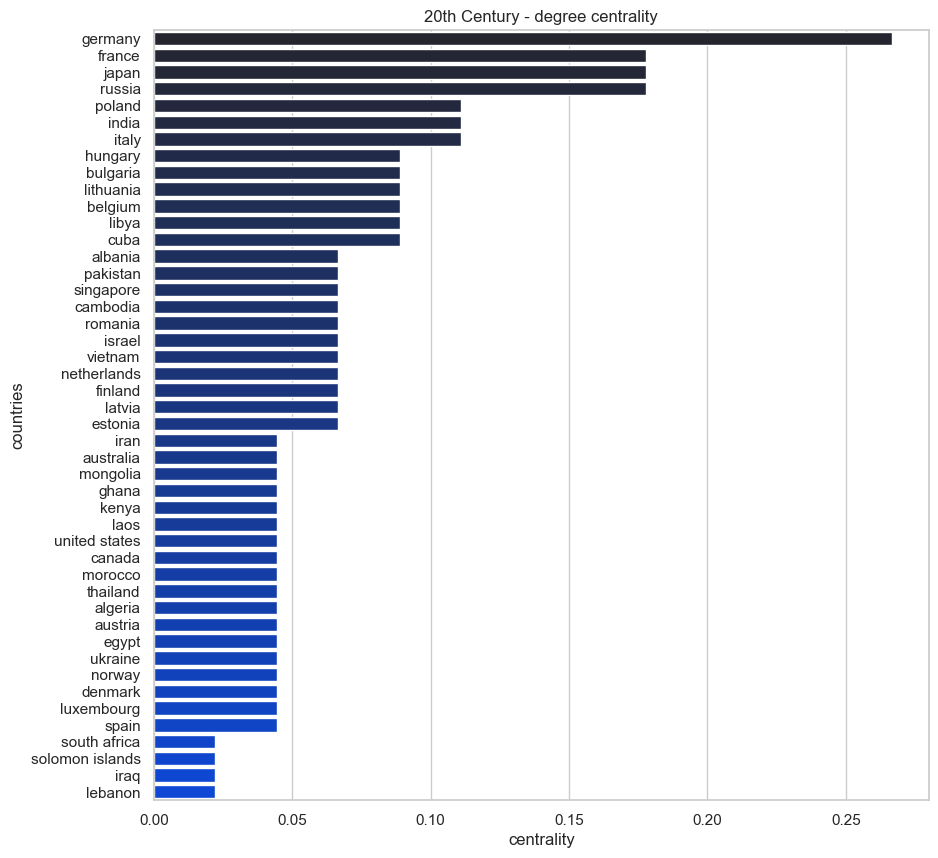

In [77]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries", palette=sns.dark_palette("xkcd:blue", 46),
    saturation = 0.9, data = degree_df).set_title("20th Century - degree centrality")

### Germany has the highest degree centrality, whic makes sense because from task 1.6 I already new it has the most connections. It is interesting to see to me that always multiple countries belong to the came degree centrality. 

#### 02 Closeness centrality

In [78]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [79]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

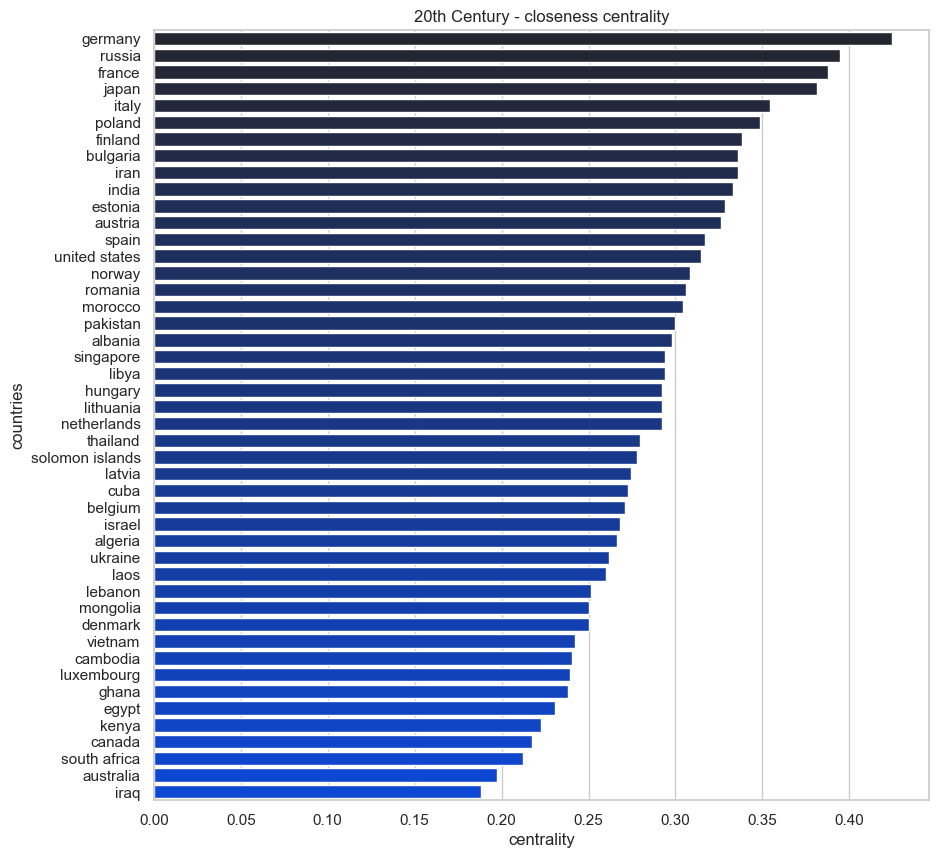

In [80]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries", palette=sns.dark_palette("xkcd:blue", 46),
    saturation = 0.9, data = closeness_df).set_title("20th Century - closeness centrality")

#### Compared the the closeness centrality of Alice in Wonderland, the closeness of the countries mentioned in th 20th Century text is a lot lower. It makes sense because there are only a few countries connected to Germany which is the most mentioned country.

#### 03 Betweenness centrality

In [81]:
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [82]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

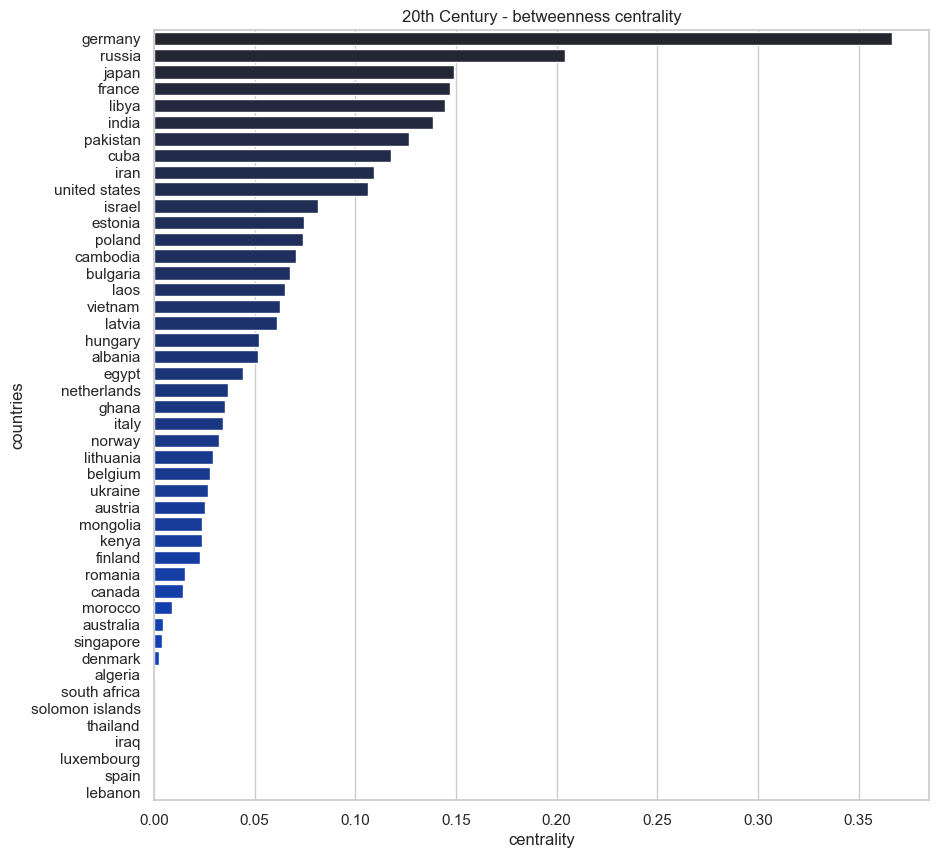

In [83]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries", palette=sns.dark_palette("xkcd:blue", 46),
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

### Also in this measure Germany scores the highest and is by far the most influentual country of the text. Which makes sense because the text is mostly about the wars. Many countries score low as they are part of the story, but in specific smaller details.

In [84]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')